In [60]:
import numpy as np
import pandas as pd
import os

## Load the data

In [61]:
train_df = pd.read_csv(os.getcwd() + '/projects/poc/datascience/nlu/twitter_sentiment_analysis/dataset/twitter_training.csv', header=None)
test_df = pd.read_csv(os.getcwd() + '/projects/poc/datascience/nlu/twitter_sentiment_analysis/dataset/twitter_validation.csv', header=None)


In [62]:
print(train_df.shape)
print(test_df.shape)

(74682, 4)
(1000, 4)


In [63]:
display(train_df.head())
display(test_df.head())

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [64]:
train_df.columns = ['#', 'refers_to', 'sentiment', 'text']
test_df.columns = train_df.columns

In [65]:
display(train_df.head())
display(test_df.head())

,#,refers_to,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


,#,refers_to,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


## Exploratory Data Analysis

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   #          74682 non-null  int64 
 1   refers_to  74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


### Null check

In [68]:
train_df.isna().sum()

#              0
refers_to      0
sentiment      0
text         686
dtype: int64

In [69]:
test_df.isna().sum()

#            0
refers_to    0
sentiment    0
text         0
dtype: int64

- There are 686 tweets / rows without text content in the training dataset. So lets drop all of those rows, as rows without texts are of no use to sentiment analysis
- Test dataset has no null values

In [70]:
train_df = train_df.dropna()
train_df.shape

(73996, 4)

### Text statistics

In [71]:
train_df['refers_to'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

#### Length distribuition of tweets

In [72]:
train_df['length'] = train_df['text'].apply(lambda text: len(text.split()))
tweet_length_mean = np.mean(train_df['length'])
print('Mean length of tweets: ' + str(tweet_length_mean))
train_df.sample(5)

Mean length of tweets: 19.226620357857183


,#,refers_to,sentiment,text,length
60793,4817,GrandTheftAuto(GTA),Positive,GTA V was so much fun. Def in the beginning wa...,54
45102,11745,Verizon,Positive,@comcastcares your company is seriously the wo...,27
18420,9957,PlayStation5(PS5),Positive,let’s gooooo 🤩,3
73063,8917,Nvidia,Neutral,Delivered first GPU-enabled production code by...,17
60379,3546,Facebook,Irrelevant,Will be there... you know how we all love this...,15


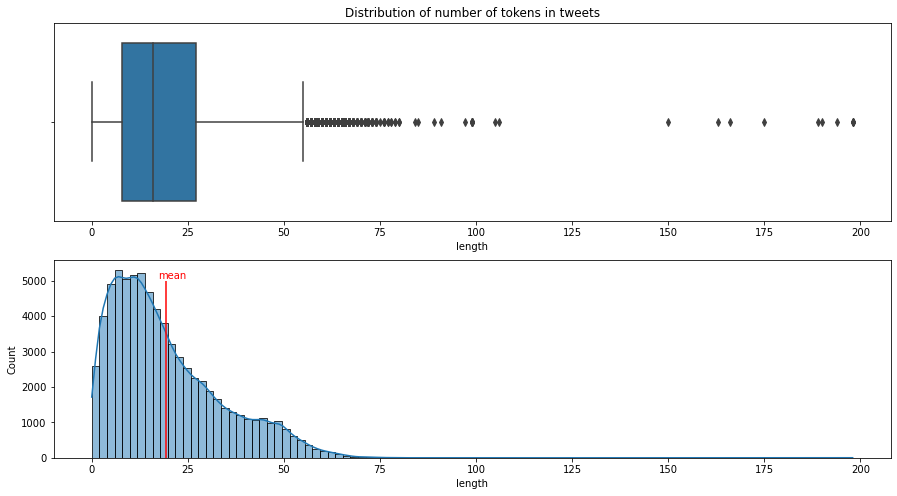

In [73]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].set_title('Distribution of number of tokens in tweets')
sns.boxplot(x = train_df['length'], ax=axes[0])
sns.histplot(x = train_df['length'], bins=100, kde=True, ax=axes[1])
axes[1].vlines(tweet_length_mean, 0, 5000, color = 'r')
plt.annotate("mean", xy=(tweet_length_mean, 5000), xytext=(tweet_length_mean-2, 5050),
            color='r')
plt.show()

- As you can see above, most of the tweets are only within 125 words in length. However there are some tweets which are lengthier than 125. So lets explore what those lengthy tweets contains

In [74]:
lengthy_tweets_df = train_df[train_df['length'] > 125]
print(lengthy_tweets_df.shape)
lengthy_tweets_df.head()

(11, 5)


,#,refers_to,sentiment,text,length
1826,2720,Borderlands,Neutral,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...,198
8546,9466,Overwatch,Positive,I REALLY HAVE THE OVERWATCH RN GAME. SEA SEA S...,166
10454,12999,Xbox(Xseries),Positive,_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ...,198
32186,7523,LeagueOfLegends,Neutral,= = = = = = = = = = = = = = = = = = = = = = = ...,198
43712,10304,PlayerUnknownsBattlegrounds(PUBG),Negative,# # # # # # # # # # # # # # # # # # # # # # # ...,198


In [75]:
for index, row in lengthy_tweets_df.iterrows():
    print('Sentiment: ' + row['sentiment'])
    print('Text: ' + row['text'])

Sentiment: Neutral
Text: _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Sentiment: Positive
Text: I REALLY HAVE THE OVERWATCH RN GAME. SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEA SEE E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E E
Sentiment: Positive
Text: _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

- As you can see above, tweets over the length of 125 are mostly garbage, hence can be dropped from the dataframe

In [76]:
train_df = train_df[train_df['length'] < 125]
train_df.shape

(73985, 5)

- Lets repeat the same for test dataset

In [77]:
test_df['length'] = test_df['text'].apply(lambda text: len(text.split()))
tweet_length_mean = np.mean(test_df['length'])
print('Mean length of tweets: ' + str(tweet_length_mean))
test_df.sample(5)

Mean length of tweets: 20.94


,#,refers_to,sentiment,text,length
343,11622,Verizon,Negative,"@verizonfios frustration! on hold for 30min, f...",39
738,832,AssassinsCreed,Neutral,Old screencaps from Assassin's Creed Odyssey w...,22
395,1448,Battlefield,Irrelevant,A ban for Battlefield 4 player ItzAwwZy has oc...,12
237,7012,johnson&johnson,Neutral,Johnson & Johnson Medical Devices Companies is...,32
10,3185,Dota2,Positive,The professional dota 2 scene is fucking explo...,17


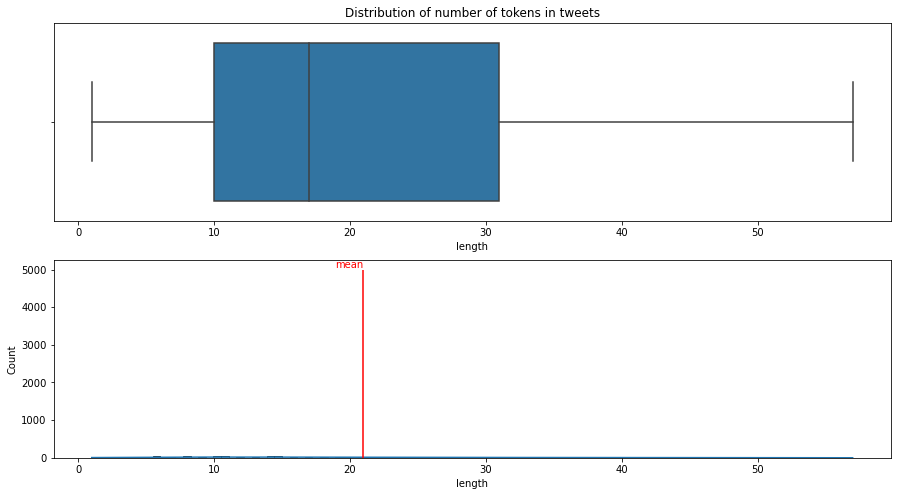

In [78]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].set_title('Distribution of number of tokens in tweets')
sns.boxplot(x = test_df['length'], ax=axes[0])
sns.histplot(x = test_df['length'], bins=100, kde=True, ax=axes[1])
axes[1].vlines(tweet_length_mean, 0, 5000, color = 'r')
plt.annotate("mean", xy=(tweet_length_mean, 5000), xytext=(tweet_length_mean-2, 5050),
            color='r')
plt.show()

- As you can see, there are no outliers in the test dataset :)

### Target analysis

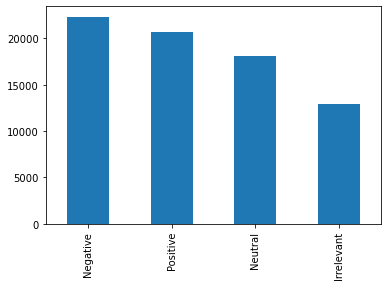

In [79]:
train_df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

30.21693527698517
27.915117144584656
24.467121064662933
17.400825023651123


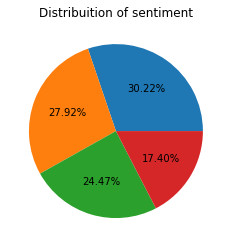

In [80]:
def my_fmt(x):
    print(x)
    return '{:.2f}%'.format(x)

value_counts = train_df['sentiment'].value_counts()

plt.pie(value_counts, autopct=my_fmt)
plt.title('Distribuition of sentiment')
plt.show()

- As you can see, the dataset contains (approximately) balanced representation of `Positive`, `Negative` and `Neutral` sentiments
- `Irrelavant` sentiment is comparatively lesser, however that is something not interesting for us

#### Distribution of length of tweet vs sentiment

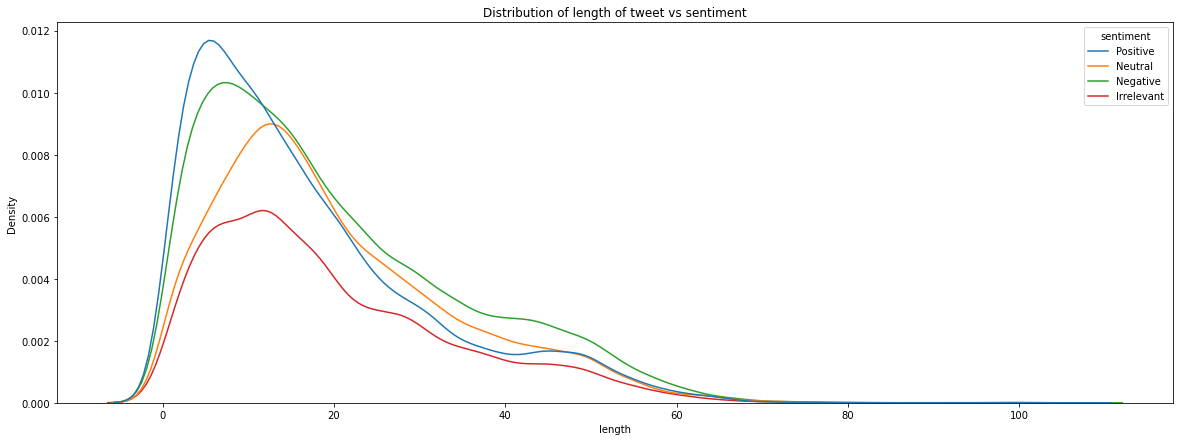

In [81]:
plt.figure(figsize=(20, 7))
sns.kdeplot(data=train_df, x='length', hue='sentiment')
plt.title('Distribution of length of tweet vs sentiment')
plt.show()

- Distributions of tweets length do not differ from each other. We can ensure using ANOVA test as we have equal dispesion and normal-like distribution.


In [82]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('length ~ sentiment', data=train_df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
sentiment,1.203538e+05,3.0,197.678394,1.059066e-127
Residual,1.501410e+07,73981.0,NaN,NaN


- p-value > 0.05, fail to reject H0.

#### Emoticons analysis

In [83]:
# !pip install -U emoji

In [84]:
# emoticons
import emoji
import regex as re

target_emojis = {'Positive': [],
                'Neutral': [],
                'Irrelevant': [],
                'Negative': []}

for _, row in train_df.iterrows():
    if(emoji.emoji_count(row['text']) >= 1):
        emoji_list = emoji.emoji_list(row['text'])
        emojis = [emoji_item['emoji'] for emoji_item in emoji_list]
        target_emojis[row['sentiment']].extend(emojis)

Top emojis for Positive 
 ['🤣', '🥰', '🥺', '🤔', '🤩', '🥳', '™', '🤯', '🦁', '‼', '🤤', '🥴', '🤖', '🤷', '🤦', '🥵', '🤞', '🦊', '🤸', '🤬']


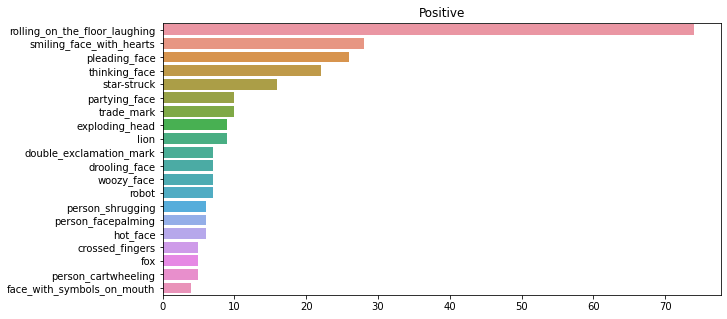

Top emojis for Neutral 
 ['🤣', '🤔', '🤦', '🥺', '™', '©', '🤩', '🥰', '‼', '🤯', '🤠', '🥳', '🤬', '5⃣', '4⃣', '3⃣', '2⃣', '6⃣', '1⃣', '🤨']


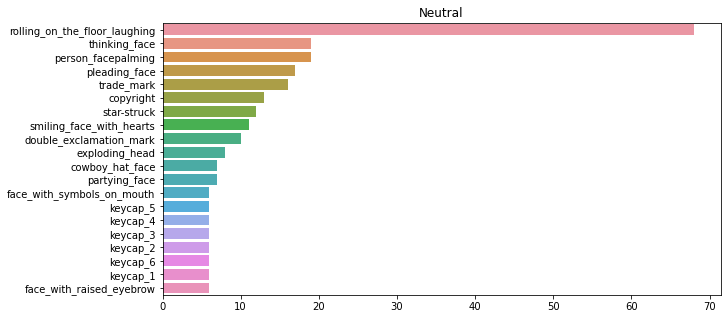

Top emojis for Irrelevant 
 ['🤣', '🥺', '🥰', '🤔', '🥳', '🤗', '🥴', '🤪', '🤦', '🧘', '🤷', '🤬', '🦋', '🤓', '🤧', '🤡', '🤢', '‼', '🤯', '🥄']


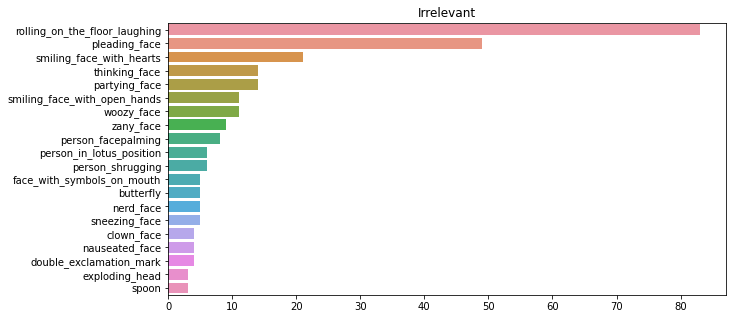

Top emojis for Negative 
 ['🤣', '🤦', '🥺', '🤬', '🥴', '🤷', '🤔', '™', '🧢', '🤡', '🤢', '🤩', '🤑', '‼', '🤪', '©', '🥰', '🤨', '🤓', '🤟']


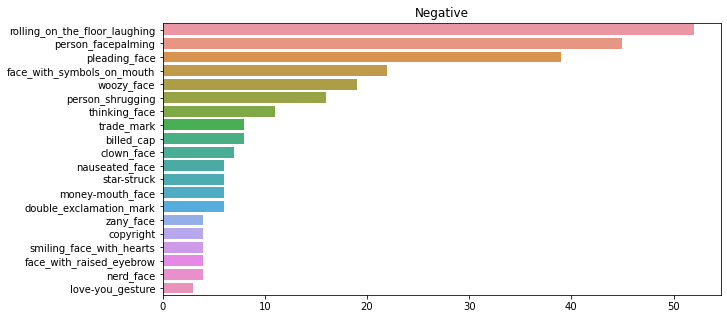

In [85]:
from matplotlib.font_manager import FontProperties

prop = FontProperties(fname='/System/Library/Fonts/Apple Color Emoji.ttc')
plt.rcParams['font.family'] = prop.get_family()

for t, emojis in target_emojis.items():
    plt.figure(figsize=(10, 5))
    bar_info = pd.Series(emojis).value_counts()[:20]
    print('=========='*10,  f'\nTop emojis for {t} \n', list(bar_info.index))
    bar_info.index = [emoji.demojize(i, delimiters=("", "")) for i in bar_info.index]
    sns.barplot(x=bar_info.values, y=bar_info.index)
        
    plt.title(f'{t}')
    plt.show()

**TODO** Write observations from the above graph

#### Distribuition of capital lettered words vs sentiment

In [86]:
train_df['capital_word_count'] = train_df['text'].apply(lambda text: np.sum([w.isupper() for w in text.split()]))

train_df.sample(10)


,#,refers_to,sentiment,text,length,capital_word_count
61479,4937,GrandTheftAuto(GTA),Irrelevant,USPS fans love poster that adds 49' to banner ...,16,1.0
64600,7866,MaddenNFL,Negative,@EAMaddenNFL how do you guys manage to make it...,13,0.0
36942,8337,Microsoft,Irrelevant,Nintendo doesn't do things for other companies...,14,0.0
3496,1805,CallOfDutyBlackopsColdWar,Negative,Just OH MY GODDD.,4,3.0
56461,11289,TomClancysRainbowSix,Negative,"I know people say it every day, but the toxici...",41,3.0
6172,262,Amazon,Positive,The Super Bowl day is the only time I can look...,35,1.0
15576,3066,Dota2,Irrelevant,I will take this to the bank! Easy victory @g...,11,1.0
18880,12435,WorldOfCraft,Neutral,I just recently earned all the [ a Horrific Vi...,14,1.0
46621,12000,Verizon,Negative,@ verizonmedia @ Verizon how long will you den...,50,1.0
45264,11772,Verizon,Negative,"Kinda missing T Mobile right now, Verizon is s...",17,1.0


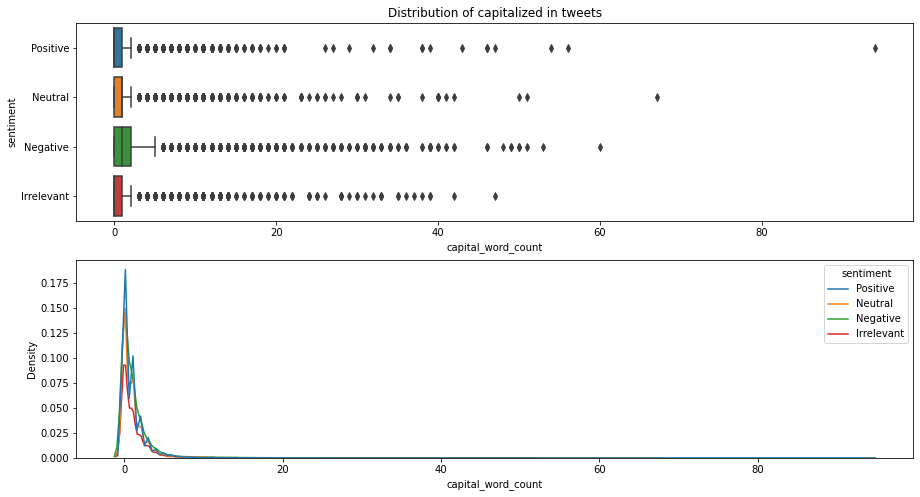

In [87]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
axes[0].set_title('Distribution of capitalized in tweets')
sns.boxplot(data=train_df, x='capital_word_count', y='sentiment', ax = axes[0])
sns.kdeplot(data=train_df, x='capital_word_count', hue='sentiment', ax=axes[1])
plt.show()

- **TODO** refers to vs sentiment

## Preprocessing and baseline

- I am going to remove all non-alphanumeric characters from the text except space
- And then will run a logistic regression as a baseline analysis

In [88]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ibrahim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
# For the train data
train_bl_df = train_df.copy()
# For test data
test_bl_df = test_df.copy()


#### OneHotEncode refers_to feature for train and test data

In [90]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first')

ohe.fit(train_bl_df['refers_to'].to_numpy().reshape(-1, 1))

train_refers_to_encoded = ohe.transform(train_bl_df['refers_to'].to_numpy().reshape(-1, 1))
test_refers_to_encoded = ohe.transform(test_bl_df['refers_to'].to_numpy().reshape(-1, 1))

train_refers_to_df = pd.DataFrame.sparse.from_spmatrix(train_refers_to_encoded, columns=ohe.get_feature_names_out())
test_refers_to_df = pd.DataFrame.sparse.from_spmatrix(test_refers_to_encoded, columns=ohe.get_feature_names_out())


In [91]:
# !python3 -m spacy download en_core_web_md

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# import spacy
import re
import emoji

# nlp = spacy.load("en_core_web_md")

class Preprocessor:
    def __init__(
        self, 
        stopwords=stopwords.words('english'), 
        vectorizer = CountVectorizer(max_features=30000, ngram_range=(1,3))
    ):
        self.stopwords = stopwords
        self.vectorizer = vectorizer
        self.vectorizer_fitted = False
        self.wnl = WordNetLemmatizer()
    
    # def remove_non_alpha_numeric(self, texts):
    #     pattern = re.compile(r'[^a-zA-Z\d\s:]')
    #     return [re.sub(pattern, '', text).strip() for text in texts]

    def tokenize(self, texts):
        return [word_tokenize(text) for text in texts]
    
    def remove_usernames(self, texts):
        print('Removing usernames...')
        pattern = re.compile('(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)')
        return [re.sub(pattern, '', text) for text in texts]

    def remove_twitter_handles(self, texts):
        print('Removing usernames...')
        pattern = re.compile('(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9-_]+)')
        return [re.sub(pattern, '', text) for text in texts]

    def remove_urls(self, texts):
        print('Removing URLs...')
        pattern = re.compile('(\w+\.com ?/ ?.+)|(http\S+)')
        return [re.sub(pattern, '<URL>', text) for text in texts]
    
    def remove_extra_space(self, texts):
        print('Removing double space...')
        pattern = re.compile(' +')
        return [re.sub(pattern, ' ', text) for text in texts]
        
    def remove_punctuation(self, texts):
        print('Removing Punctuation...')
        pattern = re.compile('[^a-zA-Z0-9]')
        return [re.sub(pattern, ' ', text) for text in texts]
    
    # def remove_stopwords(self, texts):
    #     print('Removing stopwords...')
    #     return [[w for w in text.split(' ') if w not in self.stopwords] for text in texts]
    
    def remove_numbers(self, texts):
        print('Removing numbers...')
        pattern = re.compile('[0-9]')
        return [re.sub(pattern, ' ', text) for text in texts]
    
    def decode_emojis(self, texts):
        print('Decoding emojis...')
        return [emoji.demojize(text, language='en') for text in texts] 
    
    def lemmatize(self, texts):
        print('Lemmatizing...')
        tokens_list = self.tokenize(texts)
        return [' '.join([self.wnl.lemmatize(token) for token in text]) for text in tokens_list]

    def transform(self, X, y=None, mode='train'):
        X = X.copy()
        # print('Removing Nans...')
        # X = X[~X.isnull()]                          # delete nans
        # X = X[~X.duplicated()]                      # delete duplicates
        
        # if mode == 'train':
        #     self.train_idx = X.index
        # else:
        #     self.test_idx = X.index
        # print('Counting capitalized...')
        # capitalized = [np.sum([t.isupper() for t in text.split()]) 
        #                    for text in np.array(X.values)]  # count capitalized
        # X['cap'] = capitalized
        print('Lowering...')
        X = [text.lower() for text in X]             # lower
        X = self.remove_usernames(X)                 # remove usernames
        X = self.remove_twitter_handles(X)           # remove twitter handles
        X = self.remove_urls(X)                      # remove urls
        X = self.decode_emojis(X)                    # decode emojis
        X = self.remove_punctuation(X)               # remove punctuation
        X = self.remove_numbers(X)                   # remove numbers
        X = self.remove_extra_space(X)              # remove double space
        
        # X = self.remove_stopwords(X)                 # remove stopwords
        
        # I am not lemmatizing as it is not helping in improving the accuracy and also, it takes more time to lemmatize all the words
        X = self.lemmatize(X)                        # lemmatize
        
        if (mode == 'train'):
            # self.vectorizer_fitted = True
            print('Fitting vectorizer...')
            self.vectorizer.fit(X)

        print('Vectorizing...')
        X = self.vectorizer.transform(X)             # vectorize
        
        return X

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def fit_train_predict_model(X_train, y_train, X_test, y_test):
    models = [
        LogisticRegression(C = 2, solver='liblinear', max_iter=1000),
        RandomForestClassifier()
        # DecisionTreeClassifier(),
        # MultinomialNB(),
        # SGDClassifier(max_iter=100),
        # LinearSVC(C = 2, max_iter=500)
    ]
    for model in models:
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        print('======='*10)
        print(type(model).__name__)
        print('======='*10)
        print(classification_report(y_test, y_pred_test))
        sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)
        plt.show()
    
    return models


#### Preprocess using CountVectorizer (Bag of words)

In [94]:
# For the train data
train_cv_df = train_df.copy()
# For test data
test_cv_df = test_df.copy()

In [137]:
cv_preprocessor = Preprocessor() # Default vectorizer is the CountVectorizer

train_c_vectorized_text = cv_preprocessor.transform(train_cv_df['text'])
test_c_vectorized_text = cv_preprocessor.transform(test_cv_df['text'], mode='test')

train_c_vectorized_text_df = pd.DataFrame.sparse.from_spmatrix(train_c_vectorized_text, columns= cv_preprocessor.vectorizer.get_feature_names_out())
test_c_vectorized_text_df = pd.DataFrame.sparse.from_spmatrix(test_c_vectorized_text, columns= cv_preprocessor.vectorizer.get_feature_names_out())

X_cv_train = pd.concat([train_c_vectorized_text_df, train_refers_to_df], axis = 1)
y_train = train_df['sentiment']

X_cv_test = pd.concat([test_c_vectorized_text_df, test_refers_to_df], axis = 1)
y_test = test_df['sentiment']

Lowering...
Removing usernames...
Removing usernames...
Removing URLs...
Decoding emojis...
Removing Punctuation...
Removing numbers...
Removing double space...
Lemmatizing...
Fitting vectorizer...
Vectorizing...
Lowering...
Removing usernames...
Removing usernames...
Removing URLs...
Decoding emojis...
Removing Punctuation...
Removing numbers...
Removing double space...
Lemmatizing...
Vectorizing...


In [96]:
print(X_cv_train.shape)
print(y_train.shape)

(73985, 30031)
(73985,)


In [97]:
print(X_cv_train.isna().sum())


aa                         0
aa aa                      0
aa aa aa                   0
aaa                        0
aaron                      0
                          ..
x0_TomClancysRainbowSix    0
x0_Verizon                 0
x0_WorldOfCraft            0
x0_Xbox(Xseries)           0
x0_johnson&johnson         0
Length: 30031, dtype: int64


LogisticRegression
              precision    recall  f1-score   support

  Irrelevant       0.92      0.97      0.94       172
    Negative       1.00      0.95      0.97       266
     Neutral       0.96      0.97      0.97       285
    Positive       0.95      0.95      0.95       277

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



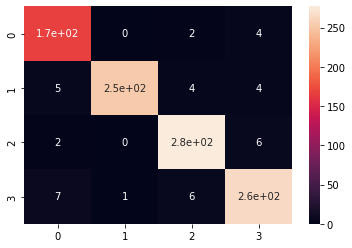

RandomForestClassifier
              precision    recall  f1-score   support

  Irrelevant       1.00      0.98      0.99       172
    Negative       0.98      0.97      0.97       266
     Neutral       0.96      0.97      0.97       285
    Positive       0.97      0.98      0.98       277

    accuracy                           0.97      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.97      0.98      1000



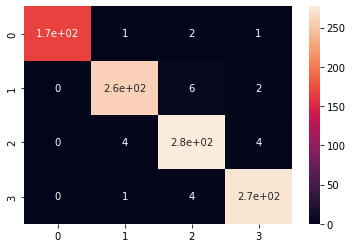

In [98]:
cv_models = fit_train_predict_model(X_cv_train, y_train, X_cv_test, y_test)

#### Vectorize the text feature using Tfidf Vectorizer

In [99]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_preprocessor = Preprocessor(vectorizer=TfidfVectorizer(lowercase=False, max_features=30000,
                                         min_df=10, ngram_range=(1, 3)))

train_bl_vectorized_text = tfidf_preprocessor.transform(train_bl_df['text'])
test_bl_vectorized_text = tfidf_preprocessor.transform(test_bl_df['text'], mode='test')


train_bl_vectorized_text_df = pd.DataFrame.sparse.from_spmatrix(train_bl_vectorized_text, columns= tfidf_preprocessor.vectorizer.get_feature_names_out())
test_bl_vectorized_text_df = pd.DataFrame.sparse.from_spmatrix(test_bl_vectorized_text, columns= tfidf_preprocessor.vectorizer.get_feature_names_out())

X_bl_train = pd.concat([train_bl_vectorized_text_df, train_refers_to_df], axis = 1)
y_train = train_df['sentiment']

X_bl_test = pd.concat([test_bl_vectorized_text_df, test_refers_to_df], axis = 1)
y_test = test_df['sentiment']


Lowering...
Removing usernames...
Removing usernames...
Removing URLs...
Decoding emojis...
Removing Punctuation...
Removing numbers...
Removing double space...
Lemmatizing...
Fitting vectorizer...
Vectorizing...
Lowering...
Removing usernames...
Removing usernames...
Removing URLs...
Decoding emojis...
Removing Punctuation...
Removing numbers...
Removing double space...
Lemmatizing...
Vectorizing...


In [100]:
print(X_bl_train.shape)
print(y_train.shape)

(73985, 28685)
(73985,)


LogisticRegression
              precision    recall  f1-score   support

  Irrelevant       0.92      0.93      0.93       172
    Negative       0.95      0.95      0.95       266
     Neutral       0.93      0.95      0.94       285
    Positive       0.94      0.92      0.93       277

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



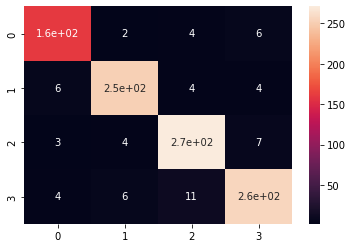

RandomForestClassifier
              precision    recall  f1-score   support

  Irrelevant       0.99      0.96      0.97       172
    Negative       0.98      0.97      0.97       266
     Neutral       0.96      0.98      0.97       285
    Positive       0.97      0.97      0.97       277

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



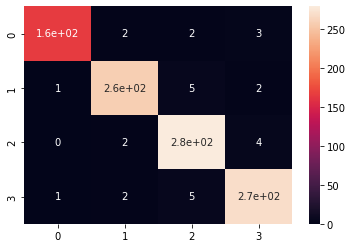

In [101]:
tfidf_models = fit_train_predict_model(X_bl_train, y_train, X_bl_test, y_test)

### Preprocess using word2vec from Genism and NLTK

In [102]:
# nltk.download('word2vec_sample')

In [103]:
# from nltk.data import find
# import gensim

# word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
# model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)
# len(model)

In [104]:
from nltk.data import find
from gensim.models import Word2Vec
from gensim.models import Phrases

class Word2Vectorizer():
    def __init__(self):
        self.model = None
        self.vector_size = 1000

    def fit(self, X):
        tweet_list = [word_tokenize(tweet) for tweet in X]
        model = gensim.models.Word2Vec(tweet_list, min_count = 1, window = 3, sg = 1, workers = 8, max_vocab_size = 40000, vector_size=self.vector_size)
        # model.save('tweets.embedding')
        self.model = model
        print(len(model.wv))
        # word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
        # self.model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)
    
    def __wv(self, token):
        # try:
        return self.model.wv[token]
        # except KeyError:
        #     print(f'{token} is not found in the model!')
        #     # return np.zeros((1,1000))
        #     pass
    
    #Build word vector for training set by using the average value of all word vectors in the tweet, then scale
    def __buildWordVector(self, text, size):
        vec = np.zeros(size)
        count = 0.
        for word in text:
            try:
                vec += self.model.wv[word]
                count += 1.
            except KeyError:
                continue
        if count != 0:
            vec /= count
        return vec

    def transform(self, X):
        # self.model = gensim.models.Word2Vec.load('tweets.embedding')
        tweet_list = [word_tokenize(tweet) for tweet in X]
        return [self.__buildWordVector(tweet, self.vector_size) for tweet in tweet_list]
         

In [105]:
# For the train data
train_w2v_df = train_df.copy()
# For test data
test_w2v_df = test_df.copy()

In [106]:
w2vectorizer = Word2Vectorizer()

w2v_preprocessor = Preprocessor(vectorizer=w2vectorizer) # Default vectorizer is the CountVectorizer

w2v_preprocessor.transform(pd.concat([train_w2v_df, test_w2v_df], axis = 0)['text'])
train_w2v_vectorized_text = w2v_preprocessor.transform(train_w2v_df['text'], mode = 'test')
test_w2v_vectorized_text = w2v_preprocessor.transform(test_w2v_df['text'], mode='test')

Lowering...
Removing usernames...
Removing usernames...
Removing URLs...
Decoding emojis...
Removing Punctuation...
Removing numbers...
Removing double space...
Lemmatizing...
Fitting vectorizer...
25574
Vectorizing...
Lowering...
Removing usernames...
Removing usernames...
Removing URLs...
Decoding emojis...
Removing Punctuation...
Removing numbers...
Removing double space...
Lemmatizing...
Vectorizing...
Lowering...
Removing usernames...
Removing usernames...
Removing URLs...
Decoding emojis...
Removing Punctuation...
Removing numbers...
Removing double space...
Lemmatizing...
Vectorizing...


In [107]:
X_w2v_train = pd.DataFrame(train_w2v_vectorized_text)
y_train = train_df['sentiment']

X_w2v_test = pd.DataFrame(test_w2v_vectorized_text)
y_test = test_df['sentiment']

LogisticRegression
              precision    recall  f1-score   support

  Irrelevant       0.46      0.23      0.30       172
    Negative       0.56      0.75      0.64       266
     Neutral       0.58      0.49      0.53       285
    Positive       0.59      0.68      0.63       277

    accuracy                           0.57      1000
   macro avg       0.55      0.54      0.53      1000
weighted avg       0.56      0.57      0.55      1000



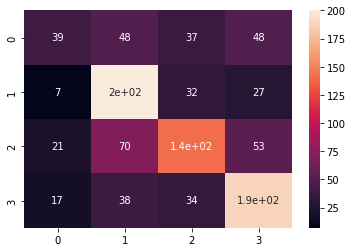

RandomForestClassifier
              precision    recall  f1-score   support

  Irrelevant       0.93      0.86      0.89       172
    Negative       0.90      0.94      0.92       266
     Neutral       0.92      0.89      0.90       285
    Positive       0.89      0.92      0.91       277

    accuracy                           0.91      1000
   macro avg       0.91      0.90      0.91      1000
weighted avg       0.91      0.91      0.91      1000



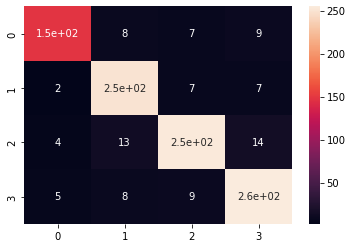

In [108]:
w2v_models = fit_train_predict_model(X_w2v_train, y_train, X_w2v_test, y_test)

In [135]:
neg_text = 'The movie is not good'
pos_text = 'I am having an wonderful day and I am very very happy :)'

X_sample_test = w2v_preprocessor.transform([neg_text, pos_text], mode = 'test')
print(np.asarray(X_sample_test).shape)
print(w2v_models[1].predict(X_sample_test))

model = w2v_preprocessor.vectorizer.model
model.wv.most_similar('not')

Lowering...
Removing usernames...
Removing usernames...
Removing URLs...
Decoding emojis...
Removing Punctuation...
Removing numbers...
Removing double space...
Lemmatizing...
Vectorizing...
(2, 1000)
['Positive' 'Positive']


[('proudly', 0.5929328203201294),
 ('activate', 0.5792703032493591),
 ('ultimately', 0.5725193023681641),
 ('ejat', 0.5684120655059814),
 ('prep', 0.5659611821174622),
 ('obtain', 0.5570627450942993),
 ('bleeding', 0.5556599497795105),
 ('timeouts', 0.5544898509979248),
 ('rarely', 0.5540674328804016),
 ('replied', 0.5535377860069275)]

In [148]:
neg_text = 'The movie is not good'
pos_text = 'The weather is great'

X_test_text = pd.DataFrame.sparse.from_spmatrix(cv_preprocessor.transform([neg_text, pos_text], mode = 'test'), columns=cv_preprocessor.vectorizer.get_feature_names_out())
X_test_refers_to = pd.DataFrame.sparse.from_spmatrix(ohe.transform(np.asarray(['Amazon', 'Facebook']).reshape(-1, 1)), columns=ohe.get_feature_names_out())
X_test_test = pd.concat([X_test_text, X_test_refers_to], axis = 1)
print(cv_models[1].predict(X_test_test))

Lowering...
Removing usernames...
Removing usernames...
Removing URLs...
Decoding emojis...
Removing Punctuation...
Removing numbers...
Removing double space...
Lemmatizing...
Vectorizing...
['Negative' 'Positive']
